## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import preprocessing

In [2]:
plt.rcParams['figure.figsize'] = [12,8]
sns.set_style('darkgrid')

## Import Data

In [3]:
house_df = pd.read_csv('Maison.csv')

In [4]:
house_df.head(3)

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0


## Data Transformation and Analysis

In [5]:
house_df = house_df.rename(index = str, columns = {'PRIX':'price','SUPERFICIE':'area','CHAMBRES':'room',
                                                   'SDB':'bathroom','ETAGES':'floor','ALLEE':'driveway',
                                                   'SALLEJEU':'game_room','CAVE':'cellar','GAZ':'gas',
                                                   'AIR':'air','GARAGES':'garage','SITUATION':'situation'})

In [6]:
house_df.head(3)

,price,area,room,bathroom,floor,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0


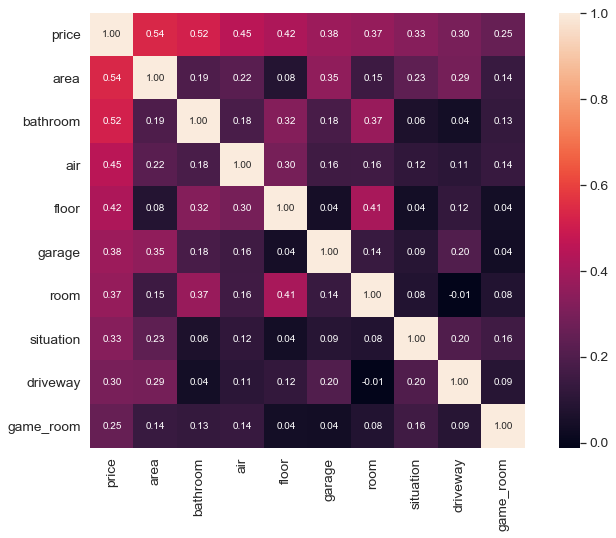

In [7]:
corrmat = house_df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(house_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

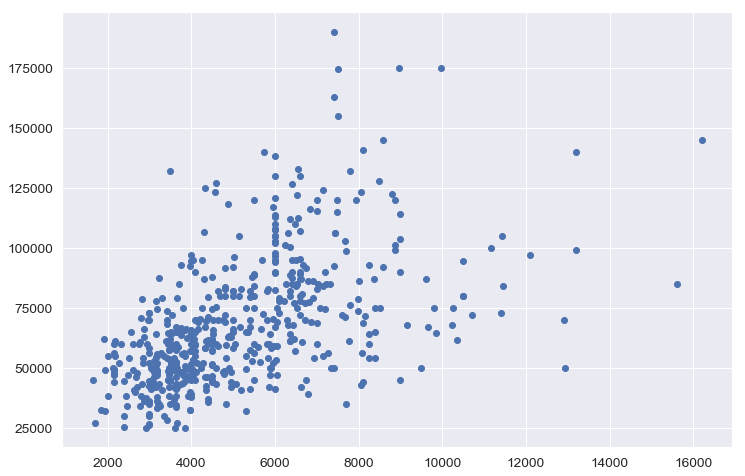

In [8]:
plt.scatter(house_df['area'],house_df['price'])

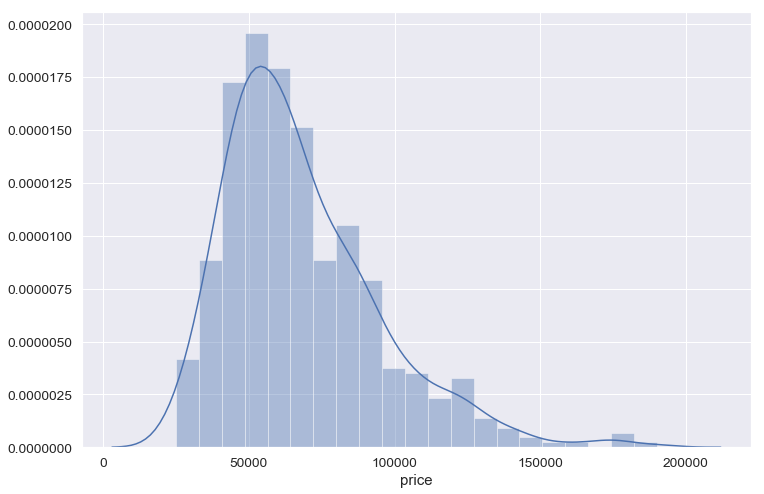

In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house_df['price'])

In [10]:
house_df['price'].describe()

count       546.000000
mean      68121.597070
std       26702.670926
min       25000.000000
25%       49125.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

In [11]:
lower_bound = 0.01
upper_bound = 0.95
res = house_df.price.quantile([lower_bound,upper_bound])
res

0.01     26725.0
0.95    120000.0
Name: price, dtype: float64

In [12]:
house_df.drop(house_df[house_df['price']>120000].index,axis=0,inplace=True)

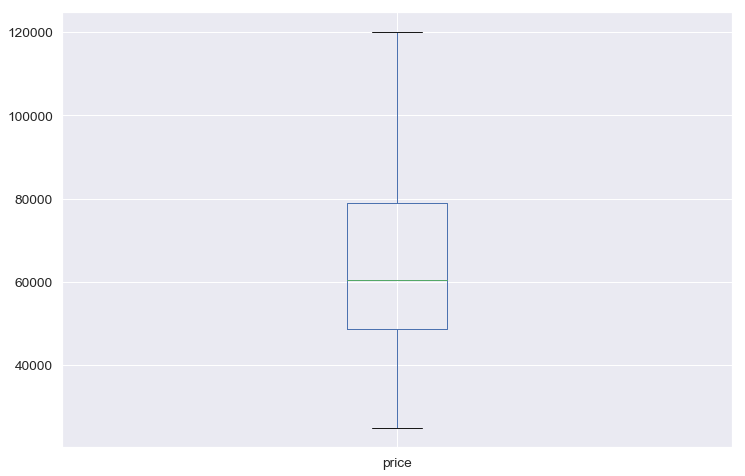

In [13]:
house_df['price'].plot(kind='box')

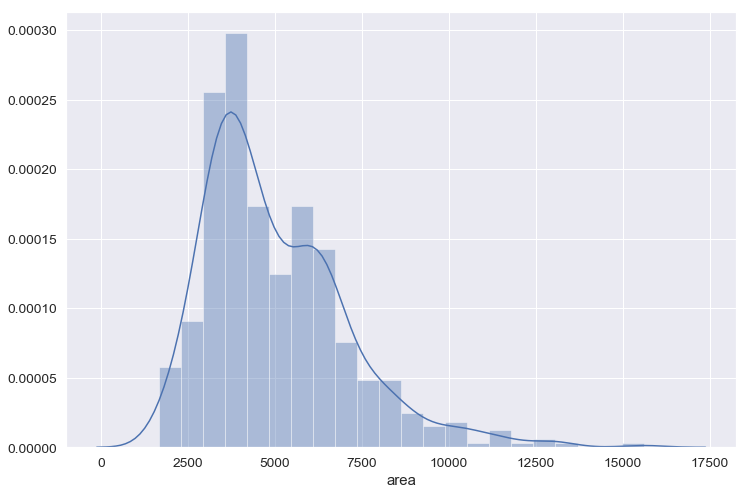

In [14]:
sns.distplot(house_df['area'])

In [15]:
house_df['area'].describe()

count      519.000000
mean      5029.017341
std       2074.775325
min       1650.000000
25%       3520.000000
50%       4500.000000
75%       6155.000000
max      15600.000000
Name: area, dtype: float64

In [16]:
lower_bound = 0.001
upper_bound = 0.95
res = house_df.area.quantile([lower_bound,upper_bound])
res

0.001    1675.9
0.950    8892.0
Name: area, dtype: float64

In [17]:
house_df.drop(house_df[house_df['area']>8892].index,axis=0,inplace=True)

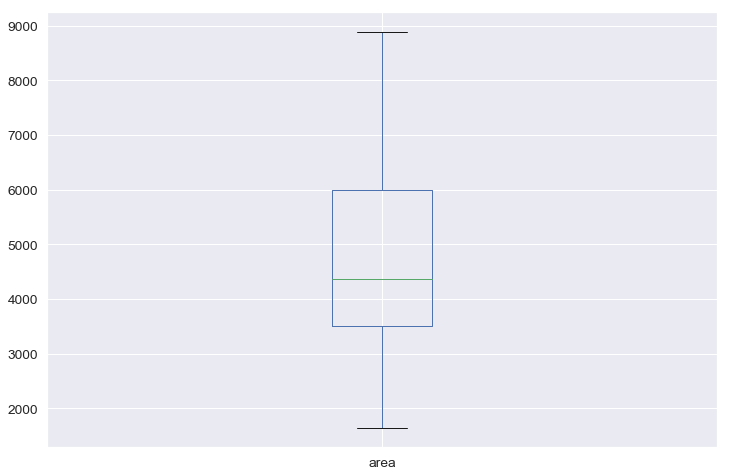

In [18]:
house_df['area'].plot(kind='box')

In [19]:
# house_room =  house_df['room']>6
# house_room.replace(to_replace=False, value =0)
# house_room.replace(to_replace=True, value =1)
# sns.lineplot(x=house_df['area'],y=house_room)
# # print(m)

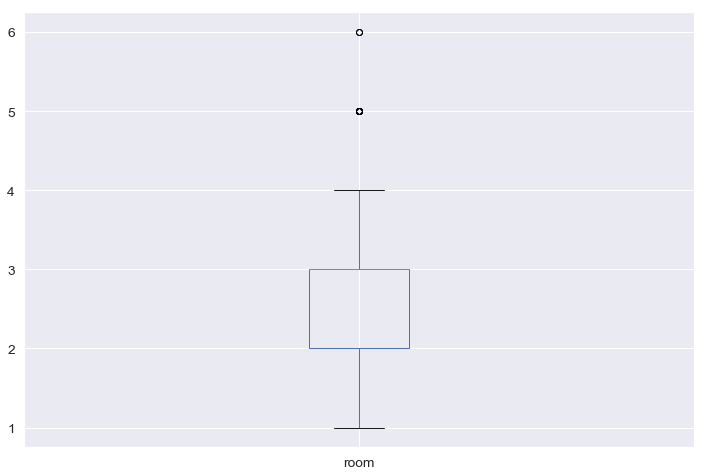

In [20]:
house_df.room.plot(kind='box')

In [21]:
house_df['room'].describe()

count    493.000000
mean       2.931034
std        0.734813
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: room, dtype: float64

In [22]:
lower_bound = 0.01
upper_bound = 0.95
res = house_df.room.quantile([lower_bound,upper_bound])
res

0.01    2.0
0.95    4.0
Name: room, dtype: float64

In [23]:
house_df.drop(house_df[house_df['room']>4].index,axis=0,inplace=True)

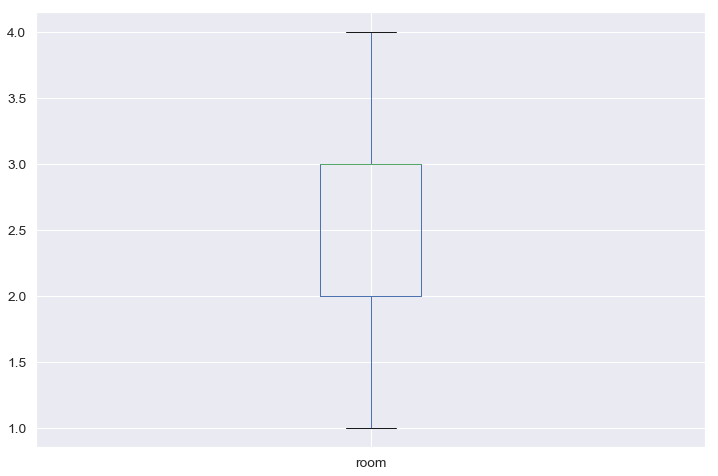

In [24]:
house_df['room'].plot(kind='box')

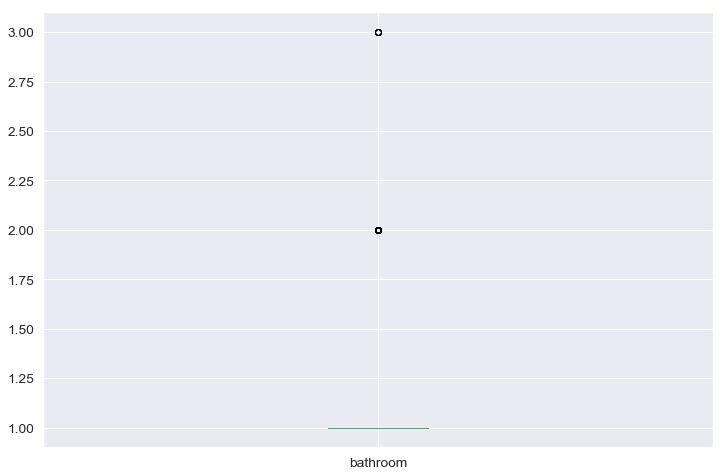

In [25]:
house_df['bathroom'].plot(kind='box')

In [26]:
house_df['bathroom'].describe()

count    482.000000
mean       1.238589
std        0.450369
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: bathroom, dtype: float64

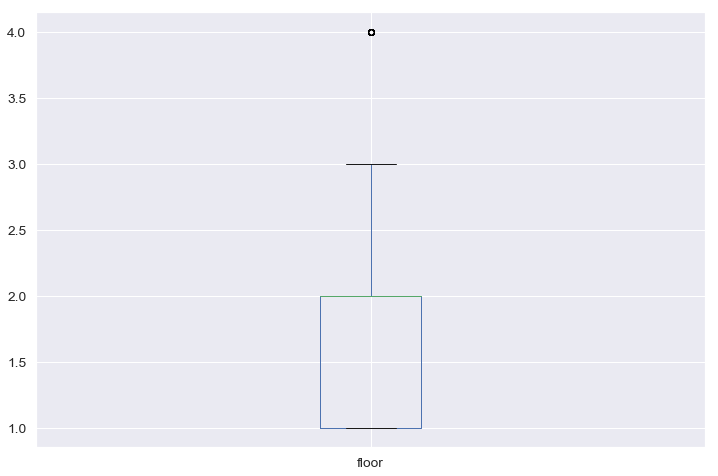

In [27]:
house_df['floor'].plot(kind='box')

In [28]:
house_df['floor'].describe()

count    482.000000
mean       1.784232
std        0.864596
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: floor, dtype: float64

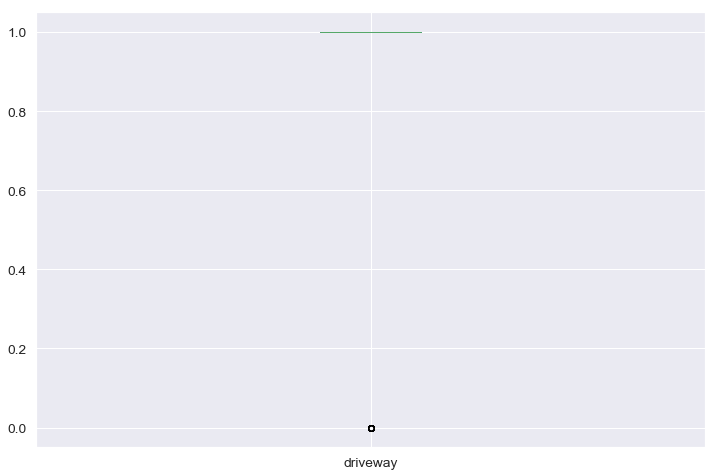

In [29]:
house_df['driveway'].plot(kind='box')

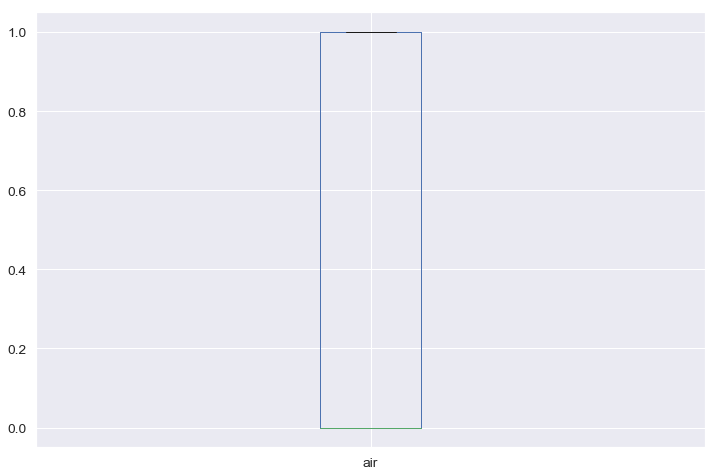

In [30]:
house_df['air'].plot(kind='box')

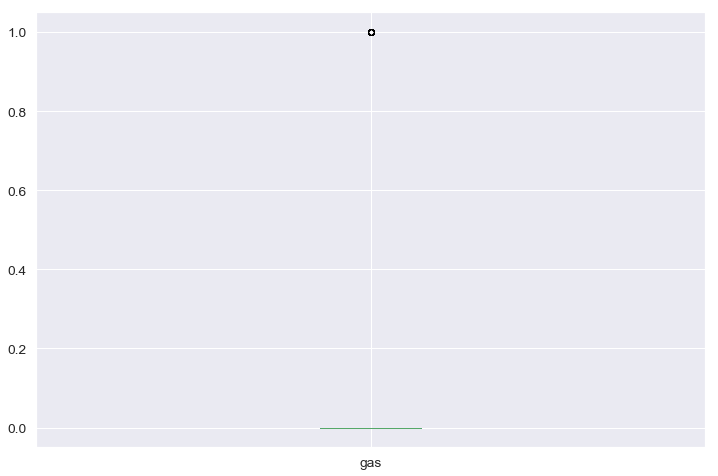

In [31]:
house_df['gas'].plot(kind='box')

In [32]:
house_df.head(3)

,price,area,room,bathroom,floor,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0


In [33]:
house_df.head(3)

,price,area,room,bathroom,floor,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0


In [34]:
lm = LinearRegression()

In [35]:
house_df.head()

,price,area,room,bathroom,floor,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [36]:
X = house_df[['area', 'room', 'bathroom', 'floor', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house_df['price']

In [37]:
X.shape

(482, 11)

## Split Data Train and test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=78)

## Standarized Data

In [39]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [40]:
X_endog = sm.add_constant(X_train)

In [41]:
res = sm.OLS(y_train,X_endog)
res.fit()

In [42]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     70.23
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           4.94e-79
Time:                        02:45:46   Log-Likelihood:                -3621.9
No. Observations:                 337   AIC:                             7268.
Df Residuals:                     325   BIC:                             7314.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.37e+04    624.341    102.022      0.000    6.25e+04    6.49e+04
x1          6024.3963    722.832      8.334      0.000    4602.377    7446.416
x2           370.4717    721.910      0.513      0.608   -1049.735    1790.679
x3          4769.0639    696.282      6.849      0.000    3399.274    6138.854
x4          6018.8354    751.670      8.007      0.000    4540.082    7497.589
x5          2063.4406    673.692      3.063      0.002     738.094    3388.788
x6          2602.1683    705.361      3.689      0.000    1214.518    3989.818
x7          1226.4458    752.277      1.630      0.104    -253.501    2706.393
x8          1960.8138    639.949      3.064      0.002     701.848    3219.779
x9          5386.9969    682.946      7.888      0.000    4043.444    6730.550
x10         1753.2246    664.452      2.639      0.009     446.054    3060.395
x11         3585.6445    681.228      5.264      0.000    2245.471    4925.818
==============================================================================
Omnibus:                        1.999   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.773
Skew:                           0.102   Prob(JB):                        0.412
Kurtosis:                       3.291   Cond. No.                         2.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [44]:
x = scaler.transform(X)

In [45]:
X_endog_test1 = sm.add_constant(x)
# print(X_endog_test1)

In [46]:
full_data_prediction = model.predict(X_endog_test1)

In [47]:
house_df['Predicted_Price'] = np.where(y,full_data_prediction,y)

In [48]:
house_df['Price_Difference'] = np.where(y,full_data_prediction-y,y)

In [49]:
house_df.to_csv('House_Price_With_Predictive_95%_OLS.csv')

## Build Model Based Sklearn

In [50]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
# Now let's look at the coefficients
print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

[6024.39627692  370.47167787 4769.06394442 6018.83540669 2063.44059851
 2602.16825787 1226.44577556 1960.81381623 5386.99692881 1753.22461247
 3585.64447764]


In [52]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef

,Coefficients
area,6024.396277
room,370.471678
bathroom,4769.063944
floor,6018.835407
driveway,2063.440599
game_room,2602.168258
cellar,1226.445776
gas,1960.813816
air,5386.996929
garage,1753.224612


In [53]:
predictions = lm.predict(X_test)

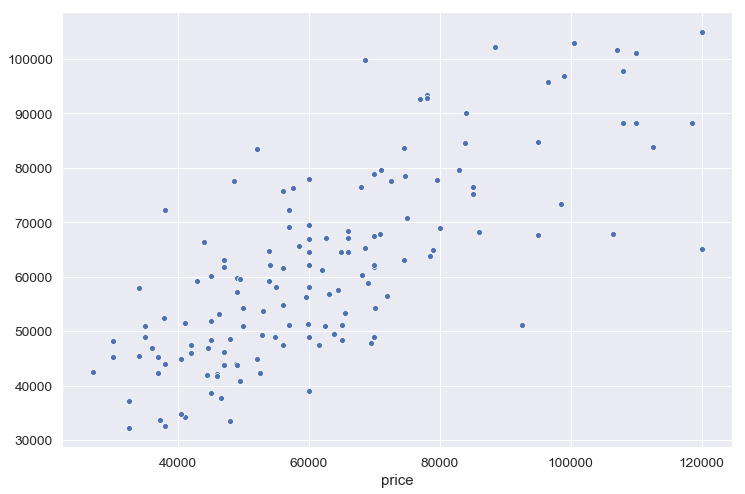

In [54]:
# To check the quality of our model, let's plot it
sns.scatterplot(y_test,predictions)

In [55]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
#import numpy as np
#from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10734.582182945536
MSE : 195135344.1757682
RMSE : 13969.085302043517


In [56]:
lm.score(X_test,y_test)

0.557463497078673

In [57]:
complete_data = lm.predict(x)

In [58]:
house_df['Predicted_Price'] = np.where(y,complete_data,y)

In [59]:
house_df['Price_Difference'] = np.where(y,complete_data-y,y)

In [60]:
house_df.to_csv('House_Price_With_Predictive_95%_SK.csv')

Text(0.5, 1.0, 'Price_Comparision')

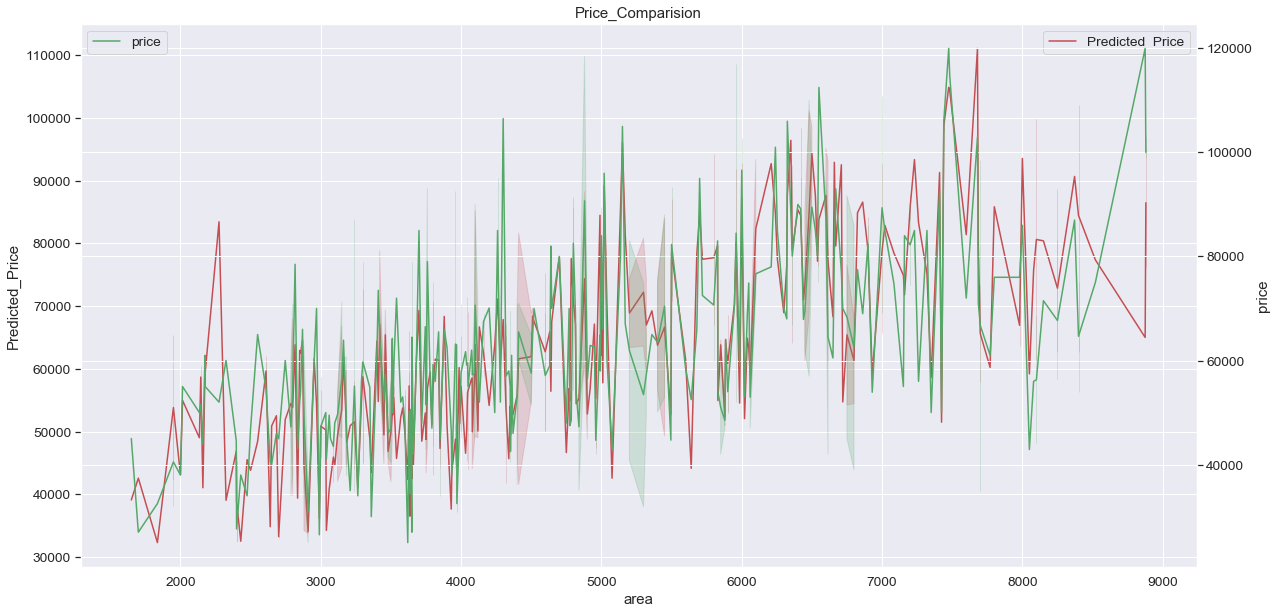

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(house_df['area'],house_df['Predicted_Price'],label='Predicted_Price',color='r')
ax2 = plt.twinx()
sns.lineplot(house_df['area'],house_df['price'],label='price', color='g')
plt.title('Price_Comparision')

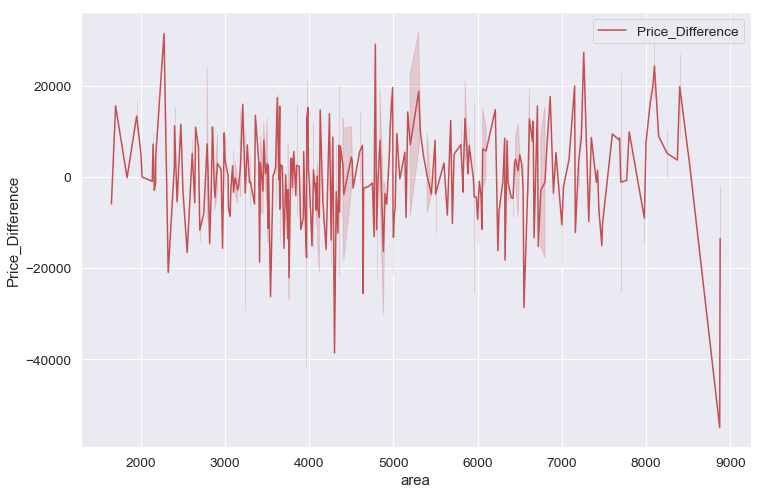

In [63]:
sns.lineplot(house_df['area'],house_df['Price_Difference'],label='Price_Difference',color='r')